<Figure size 600x600 with 0 Axes>

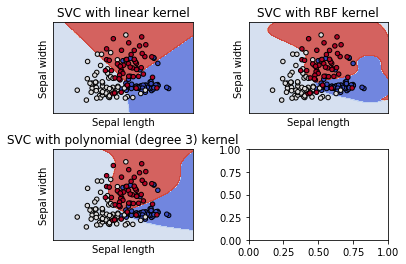

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm, datasets


def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


#将多分类超平面可视化
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



# import some data to play with
wine = datasets.load_wine()    #加载葡萄酒数据集
X = wine.data[:, :2]     #取2维数据
y = wine.target
#print(X)
#print(y)


C = 1.0    
models = (svm.SVC(kernel='linear', C=C),    #C值越小，对误分类的惩罚减小，即允许容错
          svm.SVC(kernel='rbf', gamma=0.7, C=C),   #'rbf'为RBF函数
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))    #'poly'为多项式函数，degree为多项式内核函数的度

models = (clf.fit(X, y) for clf in models)





#可视化
# title for the plots
titles = ('SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')


# Set-up 2x2 grid for plotting.
plt.figure(figsize=(6,6),dpi=100)
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
#plt.subplots_adjust用于调整边距和子图的间距

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)


for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [4]:
A=["成都","带不走","只有你"]
B=["的","的"]
C=["九月","回忆"]

zipped=zip(A,B,C)   
print(zipped)
print(list(zipped)) 

[('成都', '的', '九月'), ('带不走', '的', '回忆')]
